In [291]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#imoprt warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("adult_income.csv")

In [293]:
df

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [294]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [295]:
df.shape

(32561, 15)

In [296]:
#checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
country           0
income            0
dtype: int64

observation

we can see there is no null value present in the dataset

In [297]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [298]:
#replacing "?" with nan value, so that it would be easy to deal with it
df=df.replace("?",np.nan)
df

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [299]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
country            583
income               0
dtype: int64

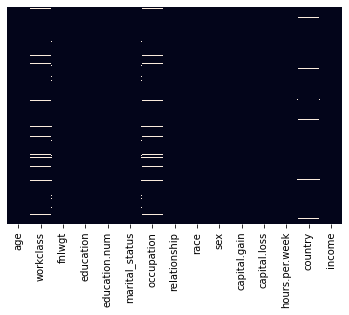

In [300]:
#checking null value via heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [302]:
#imputing missing value with most frequent as there is categorical data, note-if we wont use [0 ,model will convert only first top data as mode return series so iloc[0],help in using whole column
handlin_nan=["workclass","occupation","country"]
for i in handlin_nan:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [303]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
country           0
income            0
dtype: int64

In [304]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [305]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [306]:
#change target into binary form, map use its parameters to iterate through the columns
df["income"]=df["income"].map({"<=50K":0,">50K":1})
df["income"].dtypes

dtype('int64')

In [307]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
country           object
income             int64
dtype: object

In [308]:
df["income"].unique()

array([0, 1], dtype=int64)

#summary statistics 

In [309]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#observation

--> age,fnlwgt,education.num,caital.gain,capital.loss,income is rightly skeed as mean is greater then meadian

--> hours.week has standardized data as means us equal to median

-->fnlwgt,caital.gain,capital.loss and hourse per week, max value and 75% diffrence is quite higher, there are chances of outlier present in these columns

# Exploring Data Variables

In [310]:
#printing the columns and their unique values
df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [311]:
for col in df.columns:
    if df[col].dtypes=="object":
        print("***************",col,"***************")
        print(col,"    ",df[col].unique())
        print("unique values =    " ,df[col].value_counts())
        print("***************************************")
        print("\n\n")

*************** workclass ***************
workclass      ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
unique values =     Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
***************************************



*************** education ***************
education      ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
unique values =     HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate       

# CHecking the correlation

In [312]:
df_corr=df.corr()

In [313]:
df_corr

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


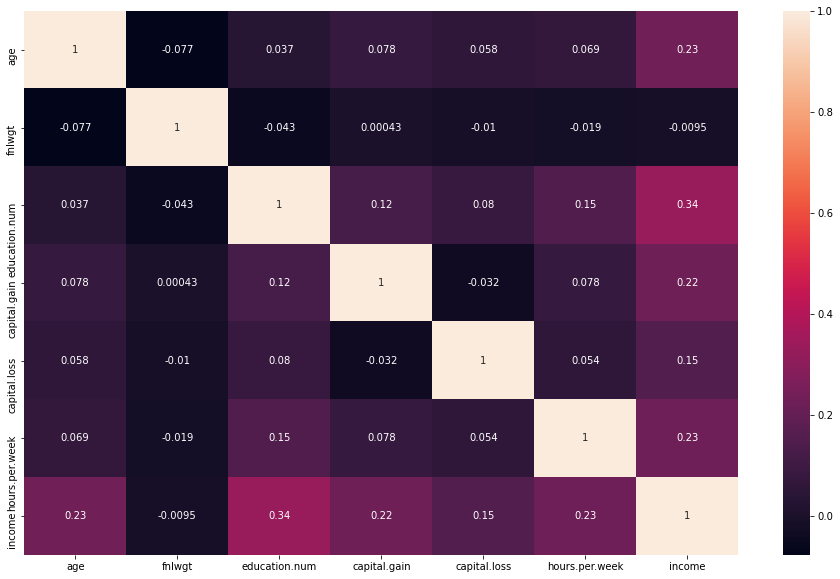

In [314]:
#visualizing through heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_corr,annot=True)
plt.show()

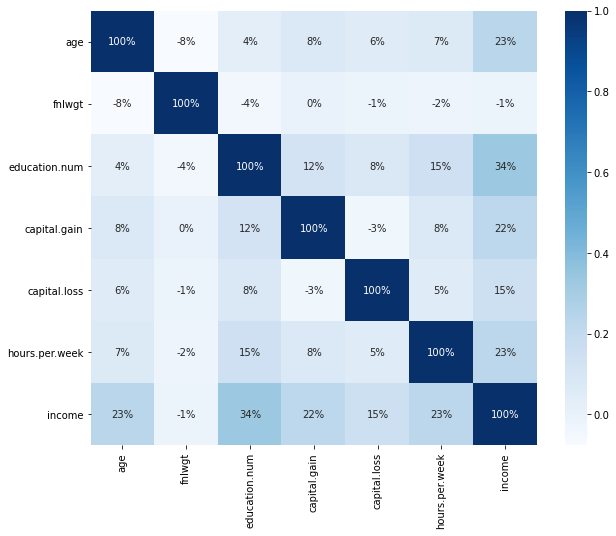

In [315]:
#correlating in terms of percentage
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,fmt=".0%",cmap="Blues")
plt.show()

Text(0.5, 1.0, 'correlation with target Variable')

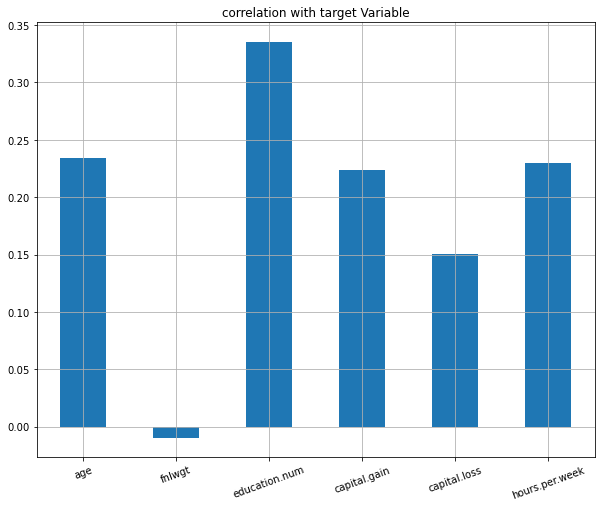

In [316]:
plt.figure(figsize=(10,8))
comparison=df.drop("income",axis=1).corrwith(df["income"])
comparison.plot(kind="bar",grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target Variable")

# Univariate Analysis

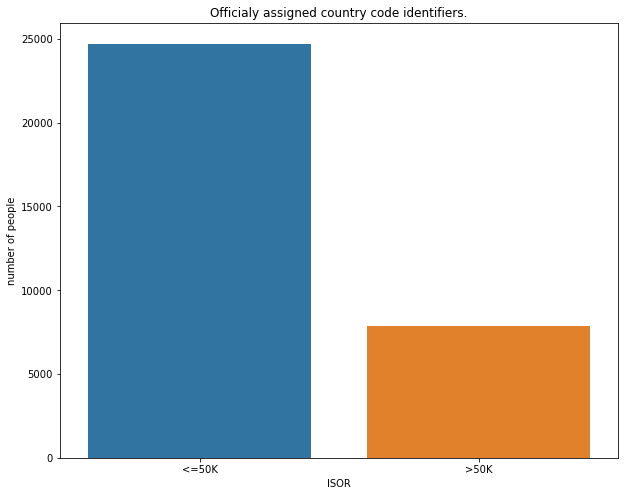


  <=50K    24720
>50K      7841
Name: income, dtype: int64


In [454]:
#checking the income count of the people
plt.figure(figsize=(10,8))
sns.countplot(x="income",data=df)
plt.title("Income count of the people")
plt.xlabel("0 = <=50k and 1= >50k")
plt.ylabel("number of people")
plt.show()
print("\n ",df.income.value_counts())

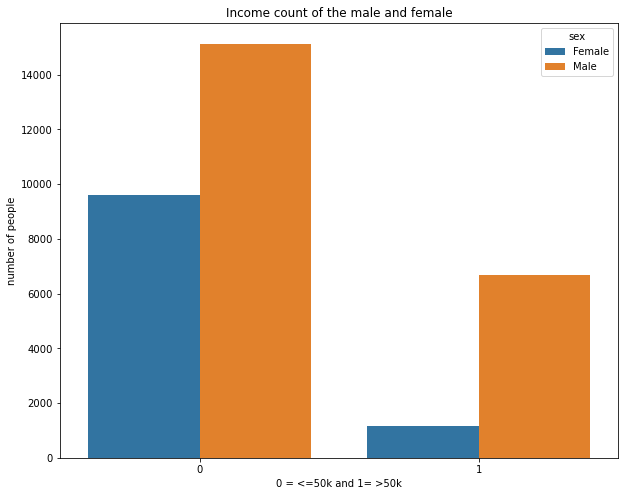


  Male      21790
Female    10771
Name: sex, dtype: int64


In [318]:
plt.figure(figsize=(10,8))
sns.countplot(x="income",hue="sex",data=df)
plt.title("Income count of the male and female")
plt.xlabel("0 = <=50k and 1= >50k")
plt.ylabel("number of people")
plt.show()
print("\n ",df.sex.value_counts())

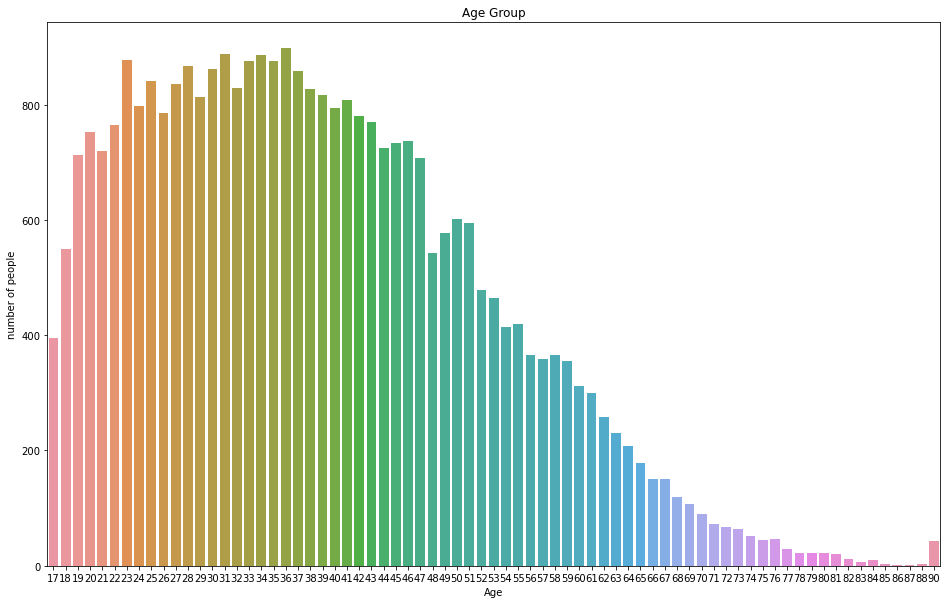


  36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


In [319]:
#checking count with different age group
plt.figure(figsize=(16,10))
sns.countplot(x="age",data=df)
plt.title("Age Group")
plt.xlabel("Age")
plt.ylabel("number of people")
plt.show()
print("\n ",df.age.value_counts())

Observation 
--> we can observe max people are from age interval from 32 to 39, also 23 year year people have equal count

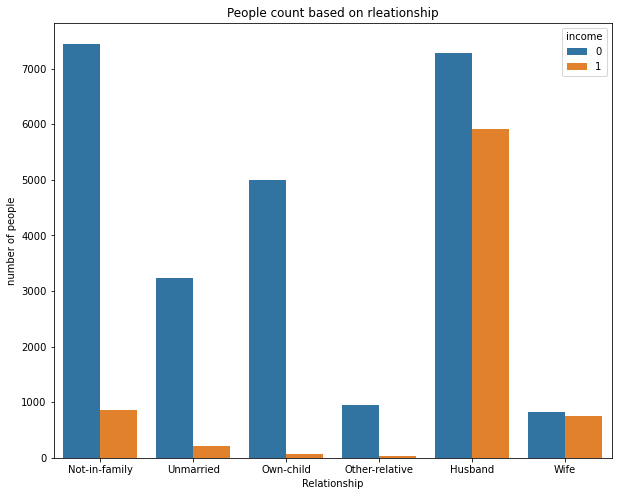


  Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [320]:
#count of people based on relationship and their sex
plt.figure(figsize=(10,8))
sns.countplot(x="relationship",hue="income",data=df)
plt.title("People count based on rleationship")
plt.xlabel("Relationship")
plt.ylabel("number of people")
plt.show()
print("\n ",df.relationship.value_counts())

observation

-->Max number of people who ean less then 50k are Not-in-family and husband whereas minimum are other-relative and wife


--->Max people earning >50k husband and minimum are other relative and those who own child

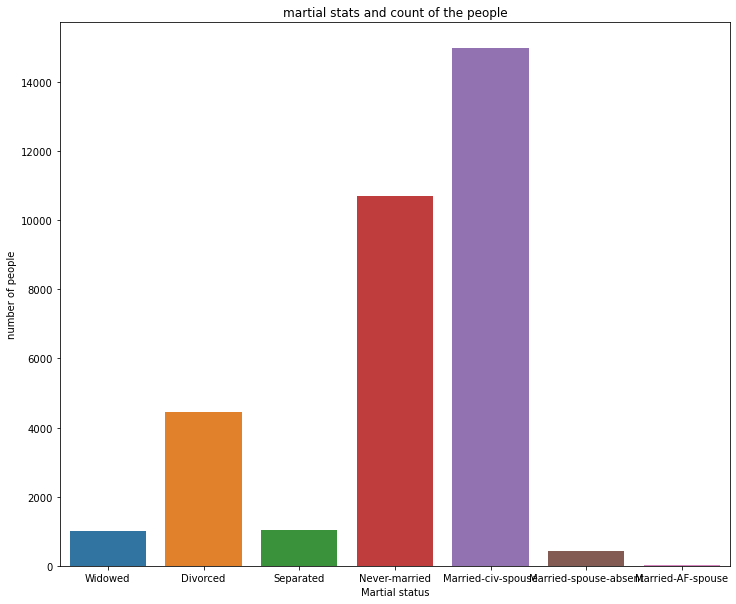


  Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [321]:
#count based on martial status
plt.figure(figsize=(12,10))
sns.countplot(x="marital_status",data=df)
plt.title("martial stats and count of the people")
plt.xlabel("Martial status")
plt.ylabel("number of people")
plt.show()
print("\n ",df.marital_status.value_counts())

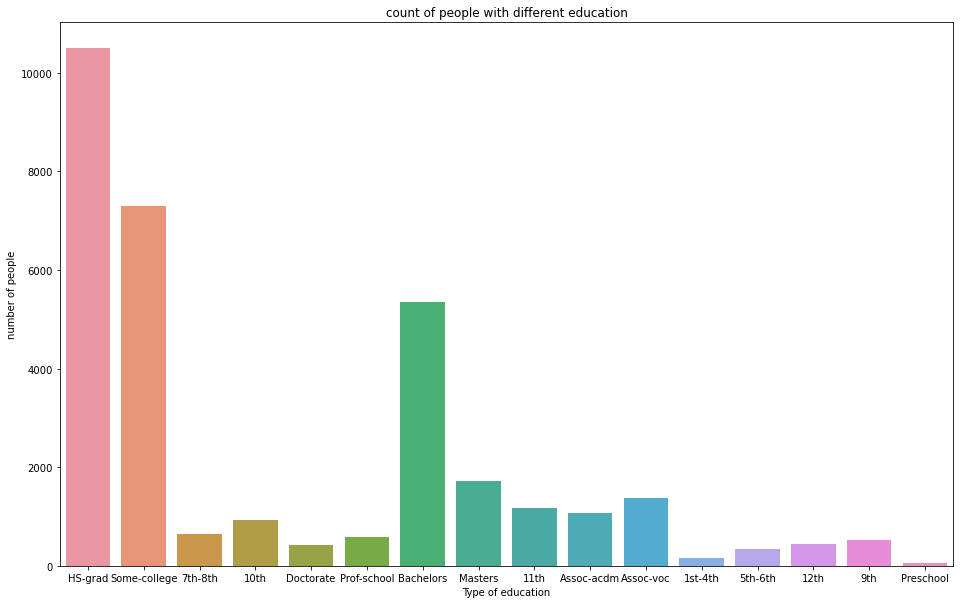


  HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [322]:
#checking by education
plt.figure(figsize=(16,10))
sns.countplot(x="education",data=df)
plt.title("count of people with different education")
plt.xlabel("Type of education")
plt.ylabel("number of people")
plt.show()
print("\n ",df.education.value_counts())

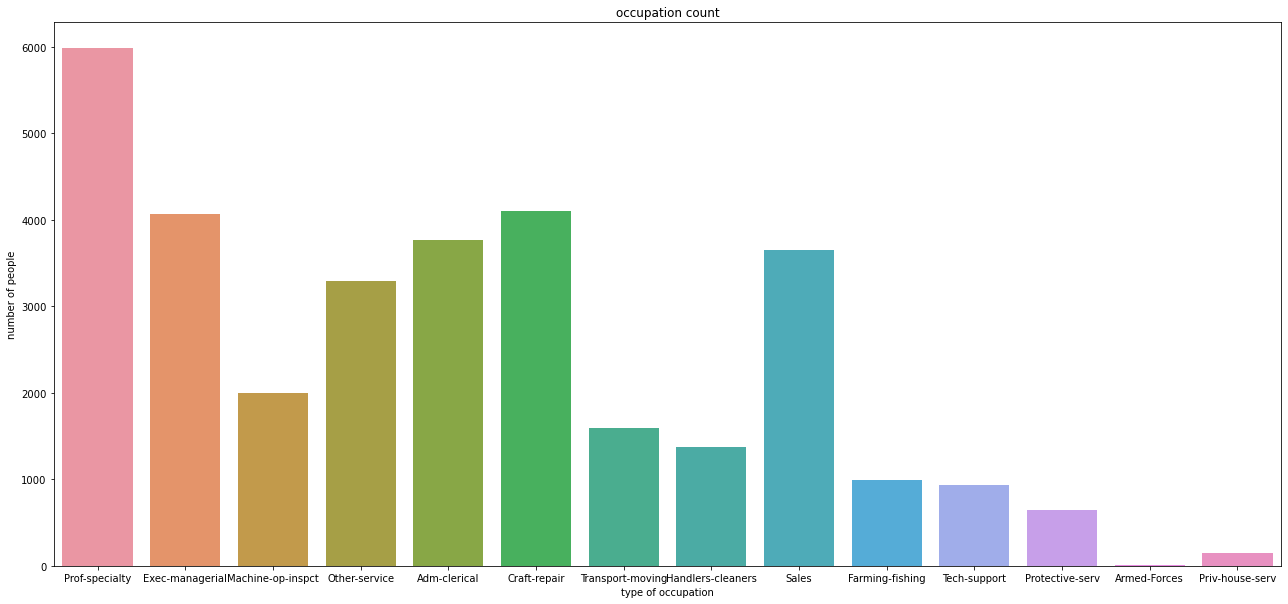


  Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [323]:
#count of people with different education
plt.figure(figsize=(22,10))
sns.countplot(x="occupation",data=df)
plt.title("occupation count")
plt.xlabel("type of occupation")
plt.ylabel("number of people")
plt.show()
print("\n ",df.occupation.value_counts())

observation

-->prof-specialty occupation have the highest people

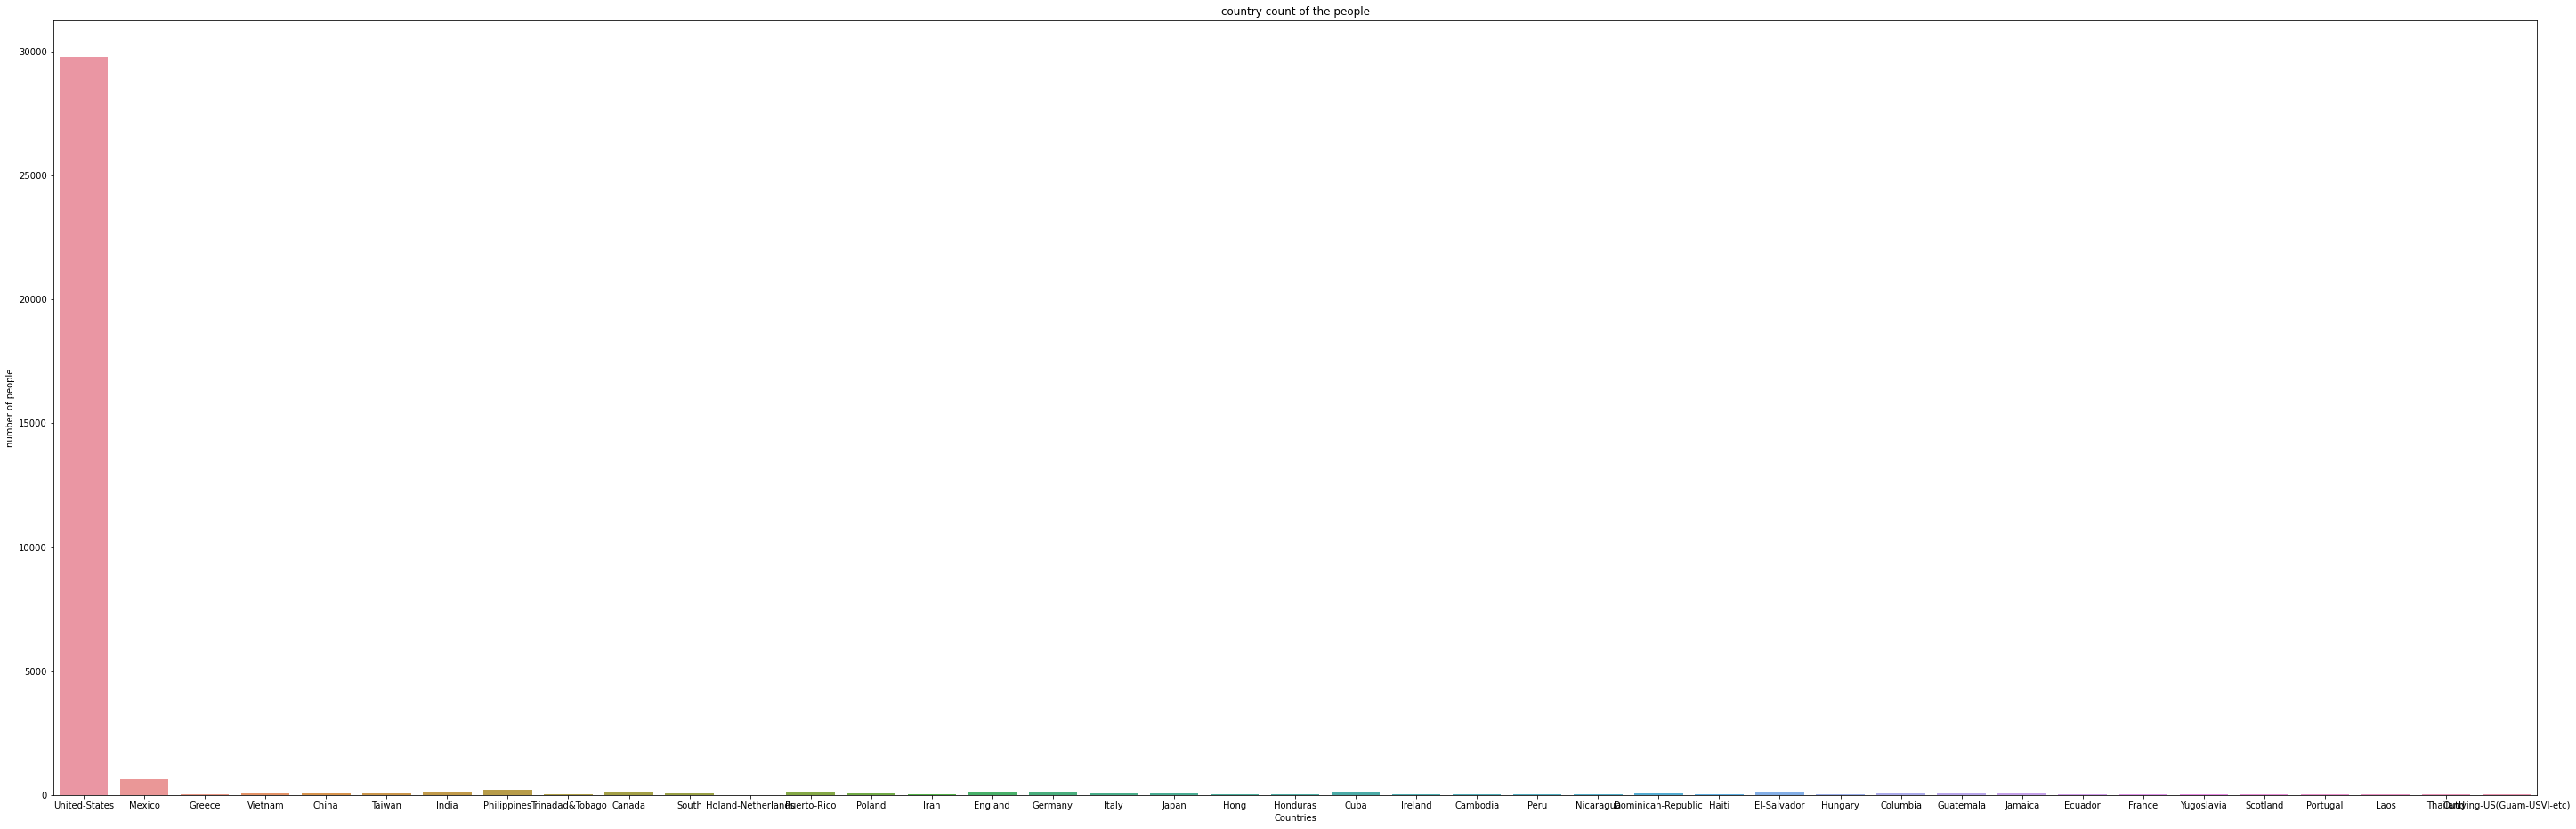


  United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                   

In [324]:
#count based on country
plt.figure(figsize=(50,16))
sns.countplot(x="country",data=df)
plt.title("country count of the people")
plt.xlabel("Countries")
plt.ylabel("number of people")
plt.show()
print("\n ",df.country.value_counts())

In [325]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'country', 'income'],
      dtype='object')

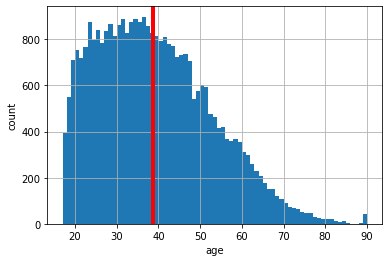

In [326]:
#checking mean of age group
ages=df["age"].hist(bins=df.age.max()-df.age.min())
plt.axvline(np.mean(df.age),linewidth=4,color="red",label="mean age")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

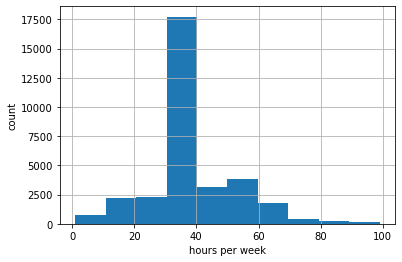

In [327]:
#hours per week
df["hours.per.week"].hist(bins=10)

plt.xlabel("hours per week")
plt.ylabel("count")
plt.show()

In [328]:
df

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


# BI-variate analysis

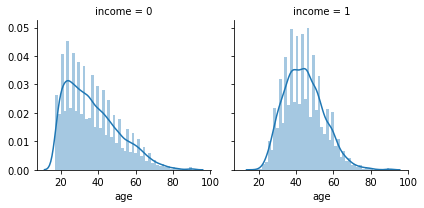

In [329]:
#exploring age vs income
sns.FacetGrid(df,col="income").map(sns.distplot,"age")


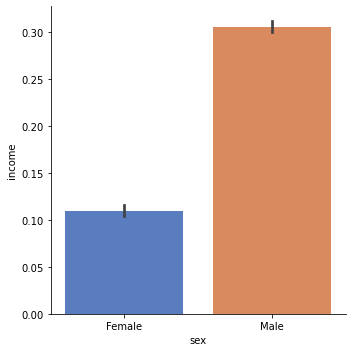

In [330]:
#sex vs income
sns.factorplot(x="sex",y="income",data=df,kind="bar",size=5,palette="muted",aspect=1)

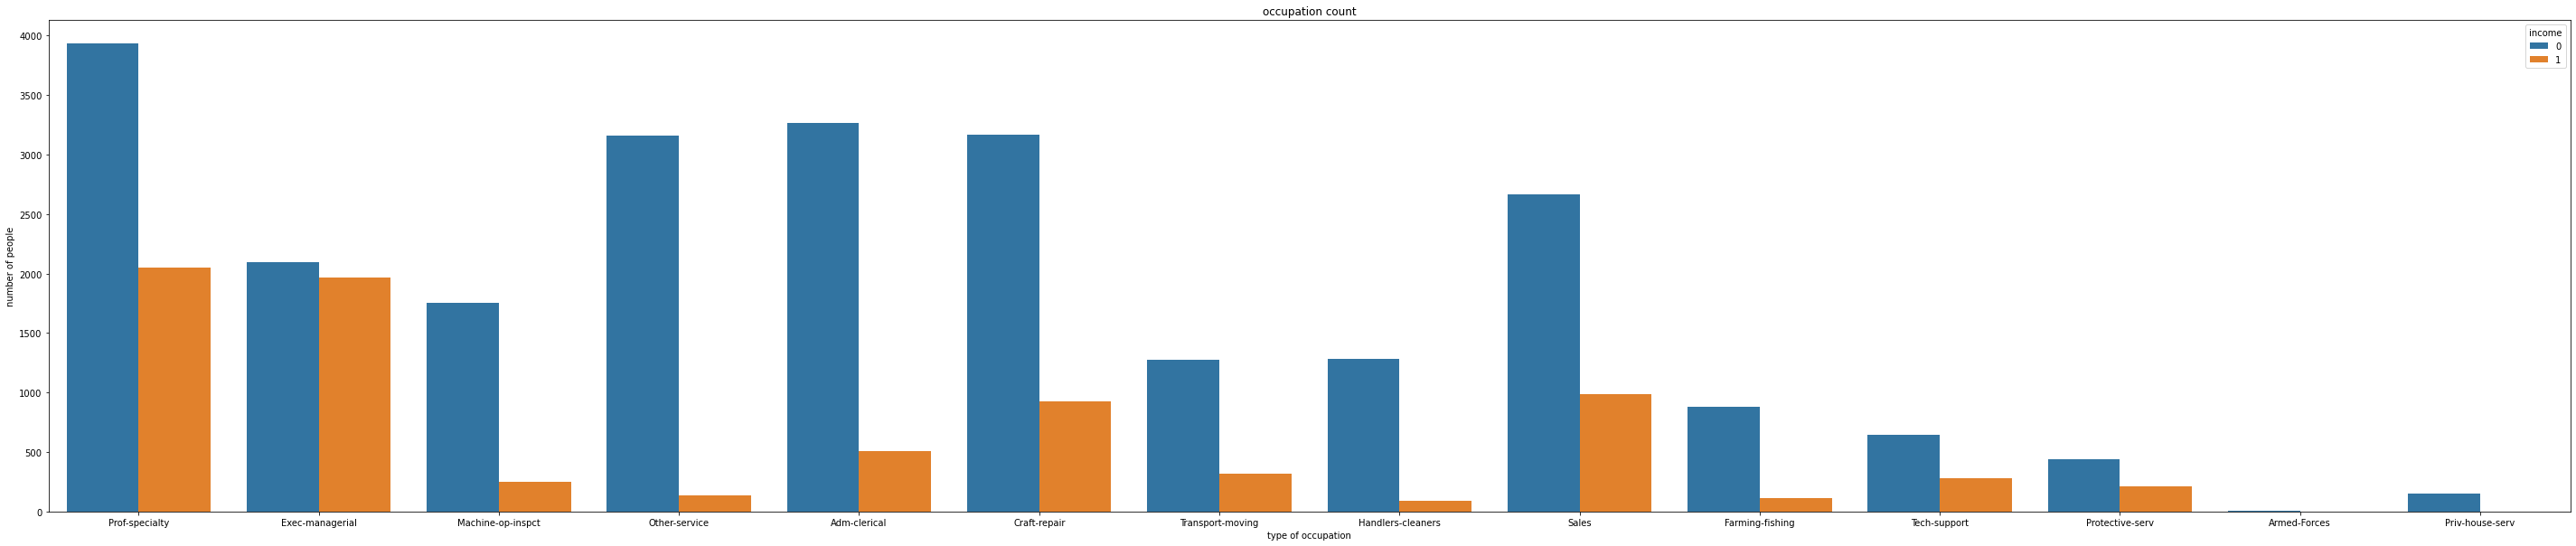


  occupation         income
Adm-clerical       0         3263
                   1          507
Armed-Forces       0            8
                   1            1
Craft-repair       0         3170
                   1          929
Exec-managerial    0         2098
                   1         1968
Farming-fishing    0          879
                   1          115
Handlers-cleaners  0         1284
                   1           86
Machine-op-inspct  0         1752
                   1          250
Other-service      0         3158
                   1          137
Priv-house-serv    0          148
                   1            1
Prof-specialty     0         3933
                   1         2050
Protective-serv    0          438
                   1          211
Sales              0         2667
                   1          983
Tech-support       0          645
                   1          283
Transport-moving   0         1277
                   1          320
Name: income, dtype

In [331]:
#occupation vs income
plt.figure(figsize=(50,10))
sns.countplot(x="occupation",hue="income",data=df)
plt.title("occupation count")
plt.xlabel("type of occupation")
plt.ylabel("number of people")
plt.show()
print("\n ",df.groupby("occupation")["income"].value_counts())

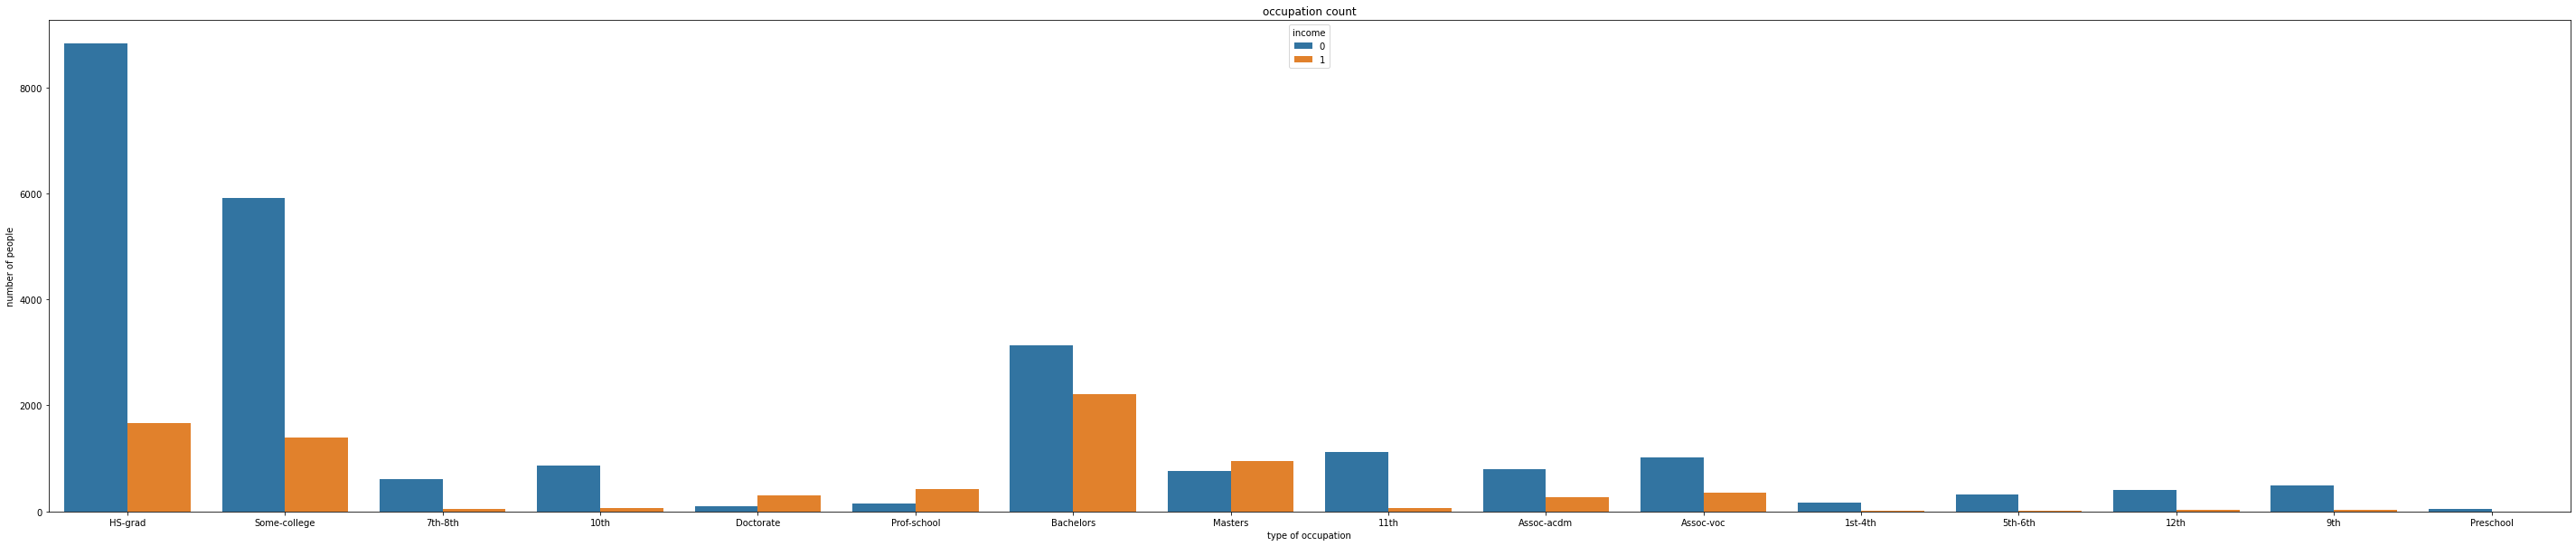


  education     income
10th          0          871
              1           62
11th          0         1115
              1           60
12th          0          400
              1           33
1st-4th       0          162
              1            6
5th-6th       0          317
              1           16
7th-8th       0          606
              1           40
9th           0          487
              1           27
Assoc-acdm    0          802
              1          265
Assoc-voc     0         1021
              1          361
Bachelors     0         3134
              1         2221
Doctorate     1          306
              0          107
HS-grad       0         8826
              1         1675
Masters       1          959
              0          764
Preschool     0           51
Prof-school   1          423
              0          153
Some-college  0         5904
              1         1387
Name: income, dtype: int64


In [332]:
plt.figure(figsize=(50,10))
sns.countplot(x="education",hue="income",data=df)
plt.title("occupation count")
plt.xlabel("type of occupation")
plt.ylabel("number of people")
plt.show()
print("\n ",df.groupby("education")["income"].value_counts())

# Multivariate analysis

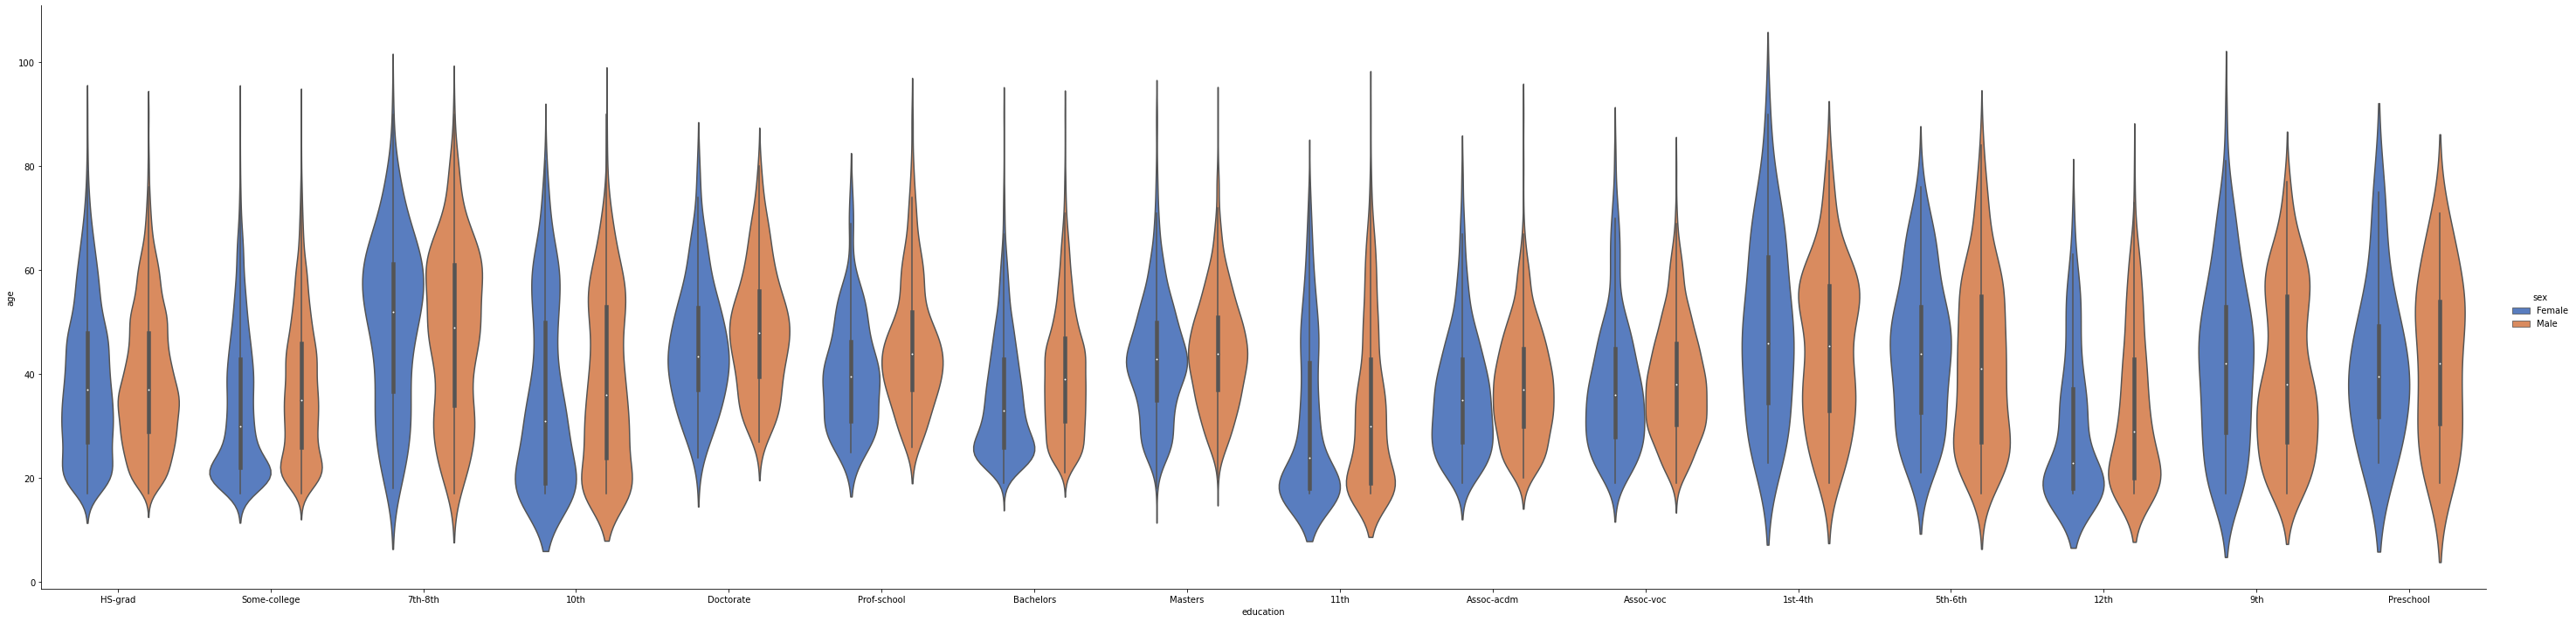

In [333]:
sns.factorplot(x="education",y="age",hue="sex",data=df,kind="violin",size=10,aspect=4,palette="muted")

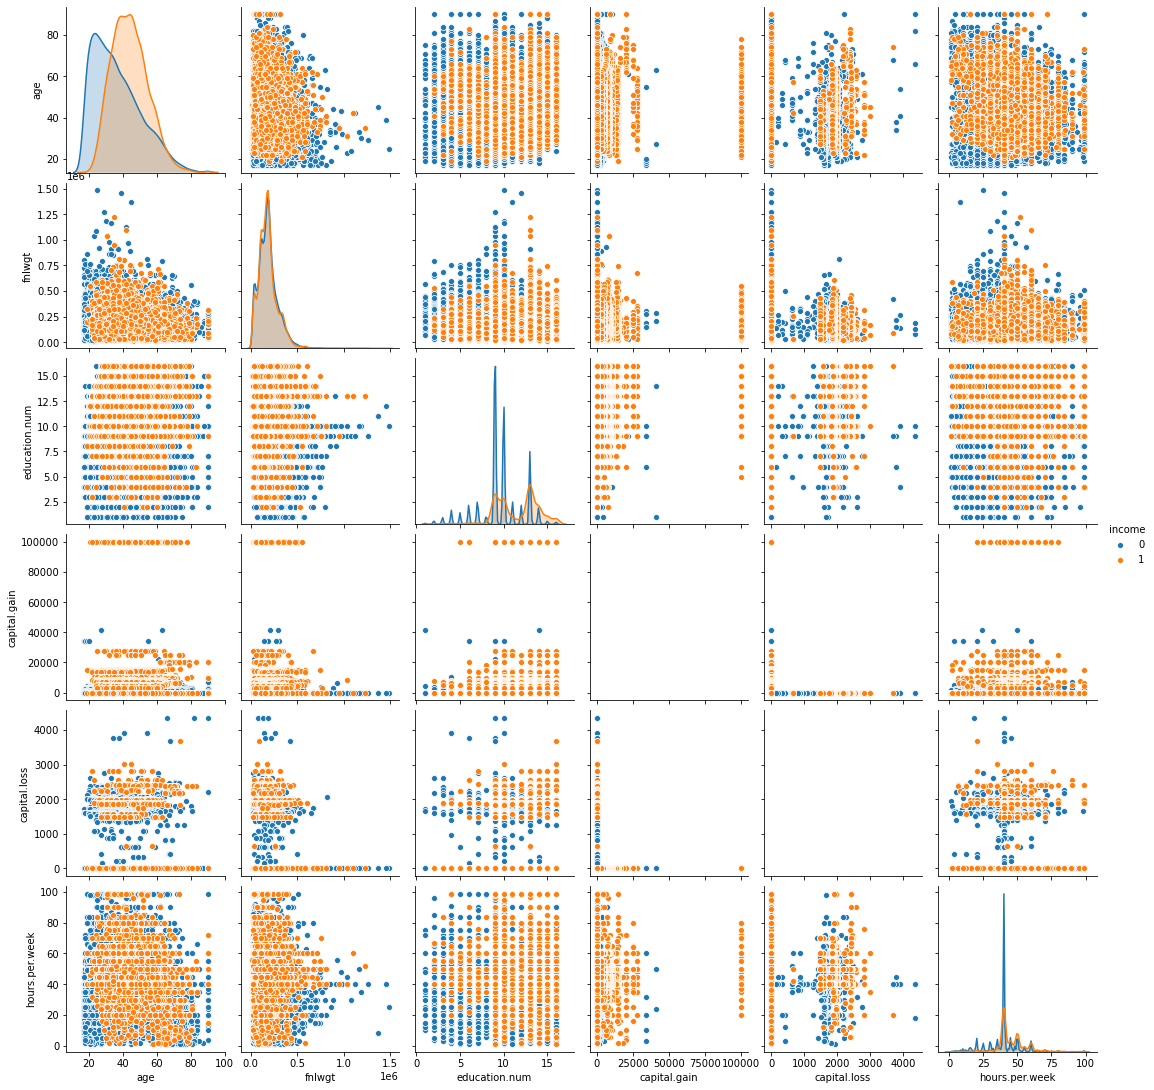

In [334]:
sns.pairplot(df,hue="income")

# checking skewness

In [335]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

In [357]:
df.skew()

age                0.558743
workclass          0.076469
fnlwgt             1.446980
education         -0.934042
education.num     -0.311676
marital_status    -0.013508
occupation         0.000565
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
country           -4.243158
income             1.212430
dtype: float64

In [358]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
country           int32
income            int64
dtype: object

In [359]:
df.skew()

age                0.558743
workclass          0.076469
fnlwgt             1.446980
education         -0.934042
education.num     -0.311676
marital_status    -0.013508
occupation         0.000565
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
country           -4.243158
income             1.212430
dtype: float64

In [378]:

col_list=["capital.gain","capital.loss"]

In [379]:
for col in col_list:
    if df[col].skew()>0.55:
        df[col]=np.log(df[col])
    

In [380]:
df

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income
0,90,3,77053,11,9,6,9,1,4,0,-inf,8.379309,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,-inf,8.379309,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,-inf,8.379309,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,-inf,8.268732,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,-inf,8.268732,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,-inf,-inf,40,38,0
32557,27,3,257302,7,12,2,12,5,4,0,-inf,-inf,38,38,0
32558,40,3,154374,11,9,2,6,0,4,1,-inf,-inf,40,38,1
32559,58,3,151910,11,9,6,0,4,4,0,-inf,-inf,40,38,0


In [384]:
#to remove infinty values in coolumns replacing with mean
col_list=["capital.gain","capital.loss"]
for col in col_list:
    df[col]= df[col].replace([np.inf, -np.inf], np.nan) 

In [385]:
df.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain      29849
capital.loss      31042
hours.per.week        0
country               0
income                0
dtype: int64

In [386]:
df[]

age               0.558743
workclass         0.076469
fnlwgt            1.446980
education        -0.934042
education.num    -0.311676
marital_status   -0.013508
occupation        0.000565
relationship      0.786818
race             -2.435386
sex              -0.719293
capital.gain      0.562619
capital.loss     -3.704026
hours.per.week    0.227643
country          -4.243158
income            1.212430
dtype: float64

In [387]:
col_list=["capital.gain","capital.loss"]
for col in col_list:
    df[col]=df[col].replace(np.nan,df[col].mean())

In [389]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
country           0
income            0
dtype: int64

In [390]:
df.skew()

age                0.558743
workclass          0.076469
fnlwgt             1.446980
education         -0.934042
education.num     -0.311676
marital_status    -0.013508
occupation         0.000565
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain       1.948488
capital.loss     -17.133056
hours.per.week     0.227643
country           -4.243158
income             1.212430
dtype: float64

In [391]:
for col in df.columns:
    if df1[col].skew()>0.55:
        df[col]=np.sqrt(df[col])
   

In [392]:
df.skew()

age                0.558743
workclass          0.076469
fnlwgt             1.446980
education         -0.934042
education.num     -0.311676
marital_status    -0.013508
occupation         0.000565
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain       0.629814
capital.loss     -19.165235
hours.per.week     0.227643
country           -4.243158
income             1.212430
dtype: float64

In [342]:
df.describe().columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'country', 'income'],
      dtype='object')

In [394]:
#removing ouliers
from scipy.stats import zscore
z_scr=abs(zscore(df))


In [395]:
z_scr

array([[3.76961234, 0.08529633, 1.06799736, ..., 0.03542945, 0.26136999,
        0.56319851],
       [3.18311167, 0.08529633, 0.53916866, ..., 1.81720429, 0.26136999,
        0.56319851],
       [2.01011032, 0.08529633, 0.03521956, ..., 0.03542945, 0.26136999,
        0.56319851],
       ...,
       [0.10398314, 0.08529633, 0.33543266, ..., 0.03542945, 0.26136999,
        1.77557289],
       [1.42360965, 0.08529633, 0.35877741, ..., 0.03542945, 0.26136999,
        0.56319851],
       [1.21564337, 0.08529633, 0.11095988, ..., 1.65522476, 0.26136999,
        0.56319851]])

In [398]:
threshold=3
print(np.where(z_scr>3))

(array([    0,     0,     1, ..., 32536, 32552, 32554], dtype=int64), array([ 0, 11,  0, ...,  8,  8,  8], dtype=int64))


In [399]:
df_final=df[(z_scr<3).all(axis=1)]

In [402]:
#checking the difference in shape after outliers
print("previous =",df.shape,"\n after z score =",df_final.shape)

previous = (32561, 15) 
 after z score = (28350, 15)


In [412]:
#splitting the data
x=df_final.drop("income",axis=1)
x.shape

(28350, 14)

In [413]:
y=df_final.income
y.shape

(28350,)

In [415]:
#standard scaling the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [417]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.20,stratify=y)

In [421]:
print(x_train.shape,"\n",x_test.shape)

(22680, 14) 
 (5670, 14)


In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

# Finding the best parameters

In [431]:
#using the gridsearchCV finding the best parameter in logistic regression
parameters={"random_state":range(1,100)}
LG=LogisticRegression()

gcv=GridSearchCV(LG,parameters)
gcv.fit(x,y)
print(gcv.best_params_)


{'random_state': 1}


In [455]:
#best parameters for knn
parameters={"n_neighbors":range(1,30)}
KNN=KNeighborsClassifier()

gcv=GridSearchCV(KNN,parameters)
gcv.fit(x,y)
print(gcv.best_params_)

KeyboardInterrupt: 

In [ ]:
#using algos in a loop

In [441]:
LG=LogisticRegression(random_state=1)
KNN=KNeighborsClassifier(n_neighbors=29)
SVC=SVC()
model1=[LG,GaussianNB(),DecisionTreeClassifier(),KNN,SVC]
for mod in model1:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.20,stratify=y)
    print("*************",mod,"***************")
    mod.fit(x_train,y_train)
    mod.score(x_train,y_train)
    y_pred=mod.predict(x_test)
    print("Accuracy score of ",mod,"is as follow" )
    print("\n",accuracy_score(y_test,y_pred))
    print("classification report=  ",classification_report(y_test,y_pred))
    print("\n\n")
    print("******************************************")
    print("\n\n")

************* LogisticRegression(random_state=1) ***************
Accuracy score of  LogisticRegression(random_state=1) is as follow

 0.8153439153439154
classification report=                 precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4322
         1.0       0.68      0.43      0.52      1348

    accuracy                           0.82      5670
   macro avg       0.76      0.68      0.70      5670
weighted avg       0.80      0.82      0.80      5670




******************************************



************* GaussianNB() ***************
Accuracy score of  GaussianNB() is as follow

 0.7881834215167548
classification report=                 precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      4322
         1.0       0.54      0.71      0.61      1348

    accuracy                           0.79      5670
   macro avg       0.72      0.76      0.73      5670
weighted avg       0.81      0.79      0

In [442]:
#cross validation
models2=[KNN,SVC]
for m in models2:
    score=cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("***********",m,"*********")
    print("Score",score)
    print("mean score =",score.mean())
    print("standard deviation",score.std())
    print("***************************************")
    print("\n\n")

*********** KNeighborsClassifier(n_neighbors=29) *********
Score [0.7319224  0.87795414 0.79188713 0.81128748 0.82222222 0.82010582
 0.82751323 0.83068783 0.83209877 0.81834215]
mean score = 0.8164021164021165
standard deviation 0.0348968440148804
***************************************



*********** SVC() *********
Score [0.68536155 0.94497354 0.82892416 0.81481481 0.81904762 0.81446208
 0.82962963 0.82892416 0.82821869 0.81234568]
mean score = 0.8206701940035274
standard deviation 0.0584619666295871
***************************************





# Ensemble Techniquies to BOOST up score

In [443]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [448]:
model_boost=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for mod in model_boost:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.20,stratify=y)
    print("*************",mod,"***************")
    mod.fit(x_train,y_train)
    mod.score(x_train,y_train)
    y_pred=mod.predict(x_test)
    print("Accuracy score of ",mod,"is as follow" )
    print("\n",accuracy_score(y_test,y_pred))
    print("classification report=  ",classification_report(y_test,y_pred))
    print("\n\n")
    print("******************************************")
    print("\n\n")
    


************* RandomForestClassifier() ***************
Accuracy score of  RandomForestClassifier() is as follow

 0.8564373897707231
classification report=                 precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4322
         1.0       0.74      0.61      0.67      1348

    accuracy                           0.86      5670
   macro avg       0.81      0.77      0.79      5670
weighted avg       0.85      0.86      0.85      5670




******************************************



************* AdaBoostClassifier() ***************
Accuracy score of  AdaBoostClassifier() is as follow

 0.8650793650793651
classification report=                 precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      4322
         1.0       0.77      0.61      0.68      1348

    accuracy                           0.87      5670
   macro avg       0.83      0.78      0.80      5670
weighted avg       0.86      0.87      0.86 

In [450]:
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=89,n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(accuracy_score(y_test,pred_gbc))
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

0.8751322751322751
[[4090  232]
 [ 476  872]]
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      4322
         1.0       0.79      0.65      0.71      1348

    accuracy                           0.88      5670
   macro avg       0.84      0.80      0.82      5670
weighted avg       0.87      0.88      0.87      5670



In [ ]:
#gradient boost is giving the best score at 87 percent

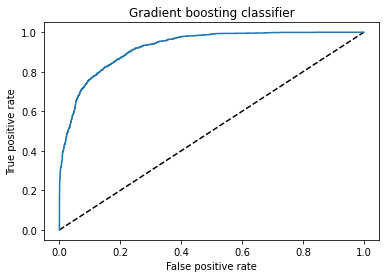

0.7966027103069383


In [452]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting Classifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Gradient boosting classifier")
plt.show()

auc_score=roc_auc_score(y_test,pred_gbc)
print(auc_score)

In [ ]:
+
+